## Python project for analyzing and developing different buying strategies 

In [5]:
import json
from coin_data import get_coin_data, plot_actions, plot_profit

In [6]:
json_file_path = "config.json"

# Open and read the JSON file
with open(json_file_path, "r") as json_file:
    config = json.load(json_file)

# print config file
for property, property_info in config.items():
    print(property, ":", property_info["description"])
print("")

# print config properties values
coin = config["coin"]["value"]
print("coin:", coin)

interval = config["interval"]["value"]
print("interval:", interval)

period = config["period"]["value"]
print("period:", period)

portfolio_size = config["portfolio_size"]["value"]
print("portfolio_size:", portfolio_size)

coin : Coin symbol to be used with yfinance.Ticker. Find supported coins on the https://finance.yahoo.com/ website
interval : Interval between each ticker data point.
period : Period of time that specifies the time interval to be used when fetching data: [period, currentTime]. Possible values are: [d, mo, y, max]
portfolio_size : Initial amount of money (USD) to be used by the trading agent.
DCA_interval : Interval between each DCA (Dollar Cost Averaging) investment (as value * ticker intervals).

coin: BTC-USD
interval: 1d
period: 4y
portfolio_size: 2000


In [7]:
# get coin data
coin_data = get_coin_data(coin, interval, period)

coin_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-12 00:00:00+00:00,8759.751953,8853.768555,8685.427734,8815.662109,20309769107,0.0,0.0
2019-11-13 00:00:00+00:00,8812.033203,8836.841797,8761.651367,8808.262695,17545755405,0.0,0.0
2019-11-14 00:00:00+00:00,8811.936523,8826.943359,8692.551758,8708.094727,19084739975,0.0,0.0
2019-11-15 00:00:00+00:00,8705.708008,8730.873047,8484.843750,8491.992188,21796856471,0.0,0.0
2019-11-16 00:00:00+00:00,8491.166016,8591.997070,8473.973633,8550.760742,16495389808,0.0,0.0


DCA_interval: 14
dca_investment_amount: 19.151846785225718


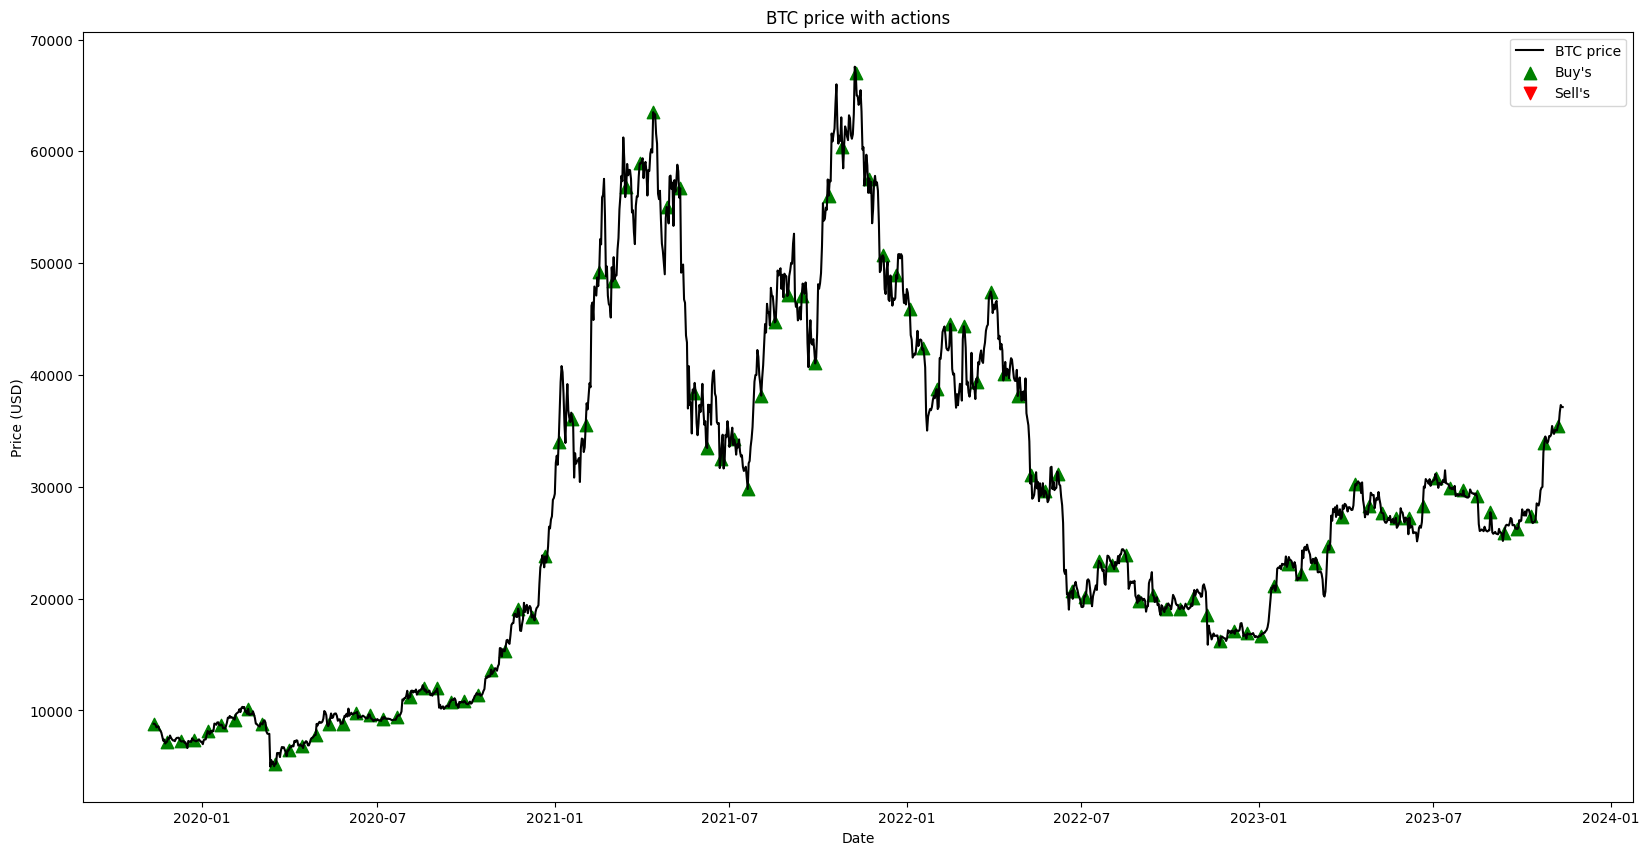

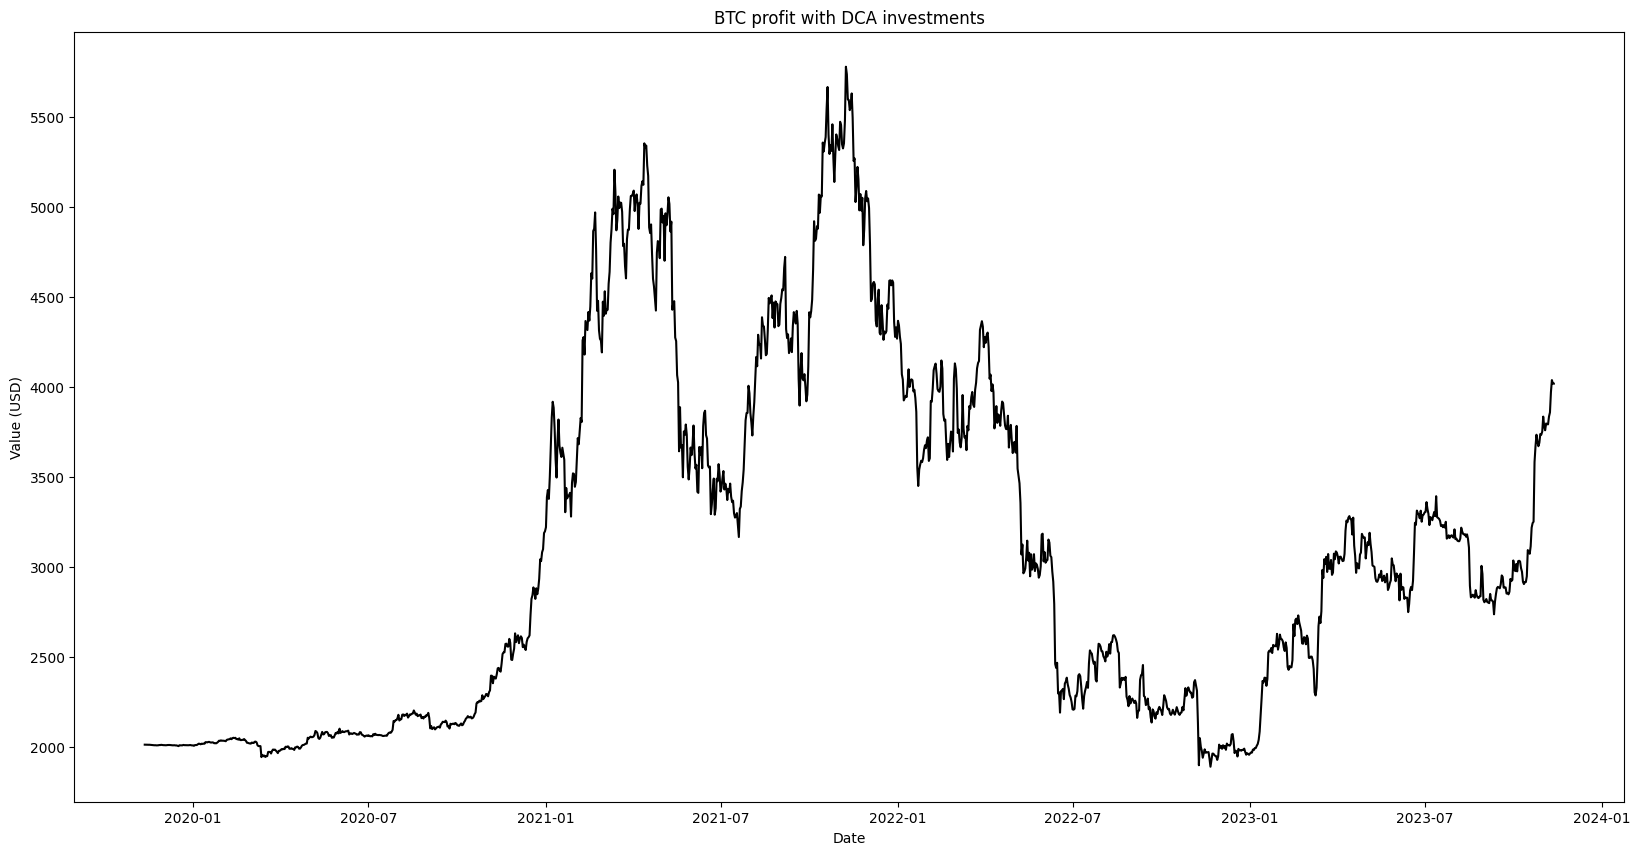

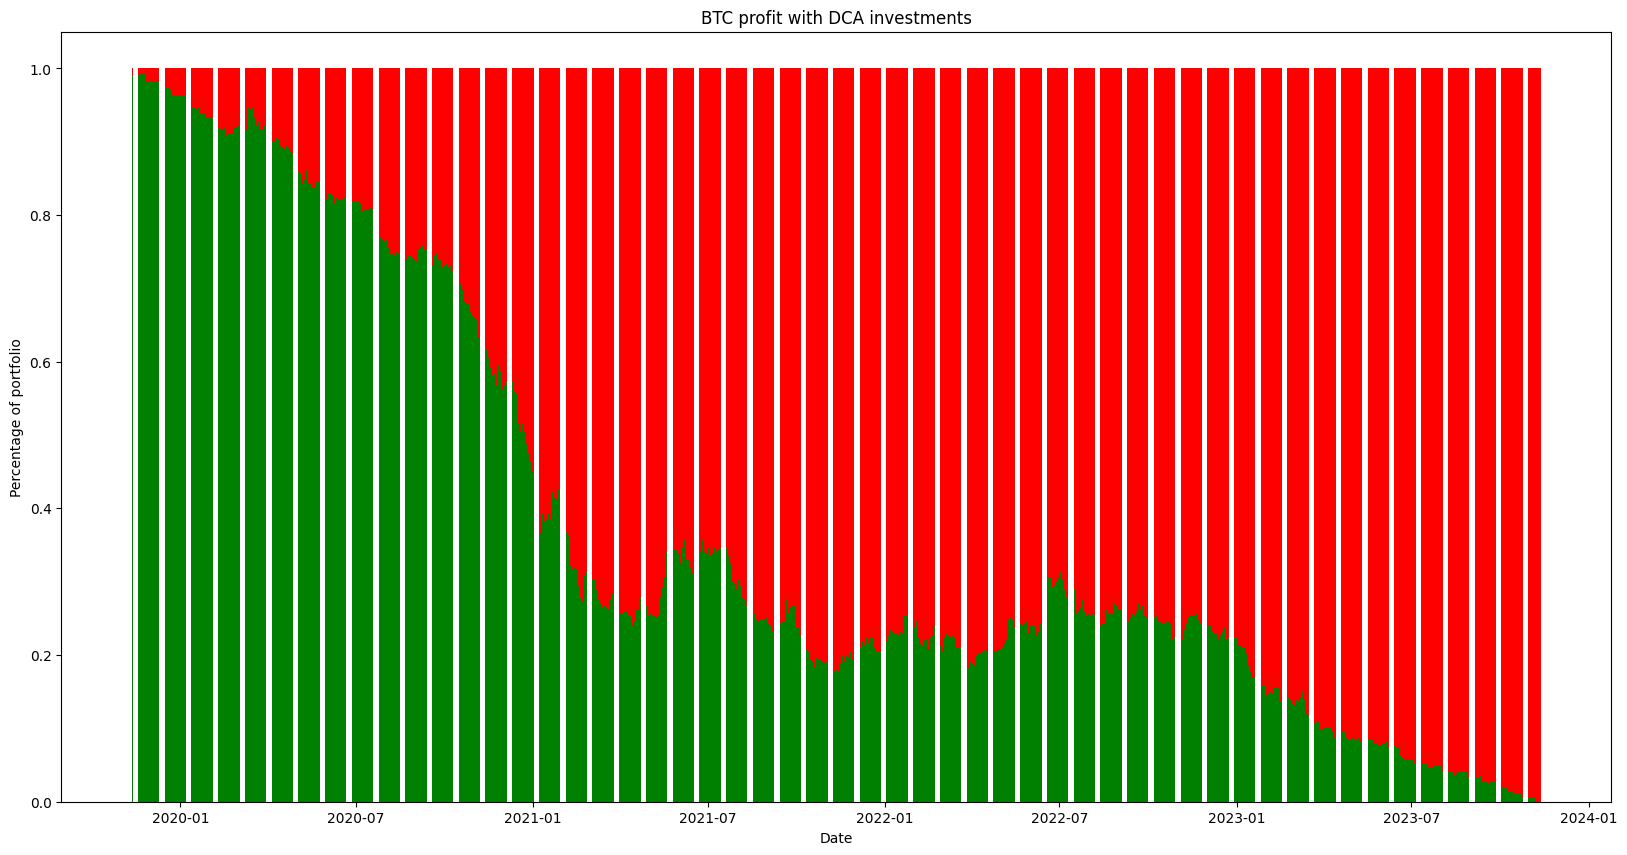

In [8]:
# use DCA as baseline agent
from agents.DCA_agent import DCA_agent

dca_interval = config["DCA_interval"]["value"]
dca_investment_amount = portfolio_size * dca_interval / len(coin_data)

print("DCA_interval:", dca_interval)
print("dca_investment_amount:", dca_investment_amount)

dca_agent = DCA_agent(dca_interval, dca_investment_amount)

dca_actions = dca_agent.act(coin_data)
dca_investment = dca_agent.get_investments(coin_data)

# plot DCA actions
plot_actions(coin_data, dca_actions, "BTC")
plot_profit(coin_data, dca_investment, "BTC", "DCA")

In [ ]:
# BB agent